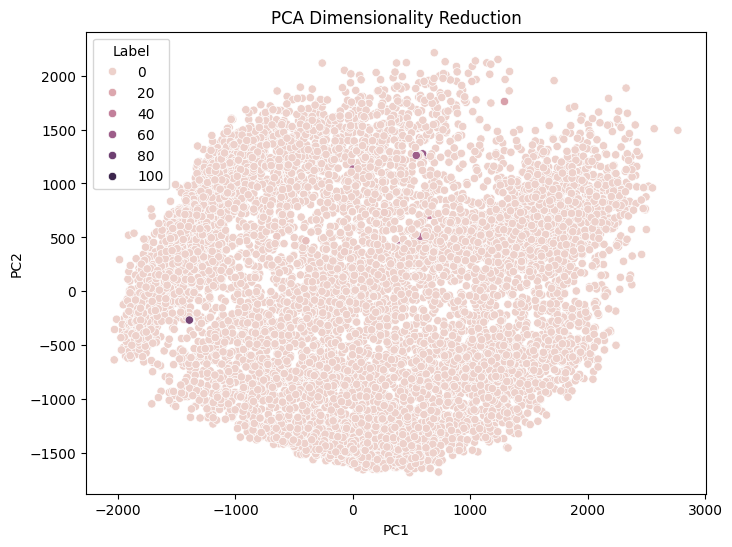

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def dimensionality_reduction():
    # Load dataset
    data = pd.read_csv('fashion-mnist_test.csv')

    # Apply PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data.iloc[:, :-1])

    # Convert to DataFrame
    pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
    pca_df['Label'] = data.iloc[:, -1]

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Label', data=pca_df)
    plt.title('PCA Dimensionality Reduction')
    plt.show()

dimensionality_reduction()

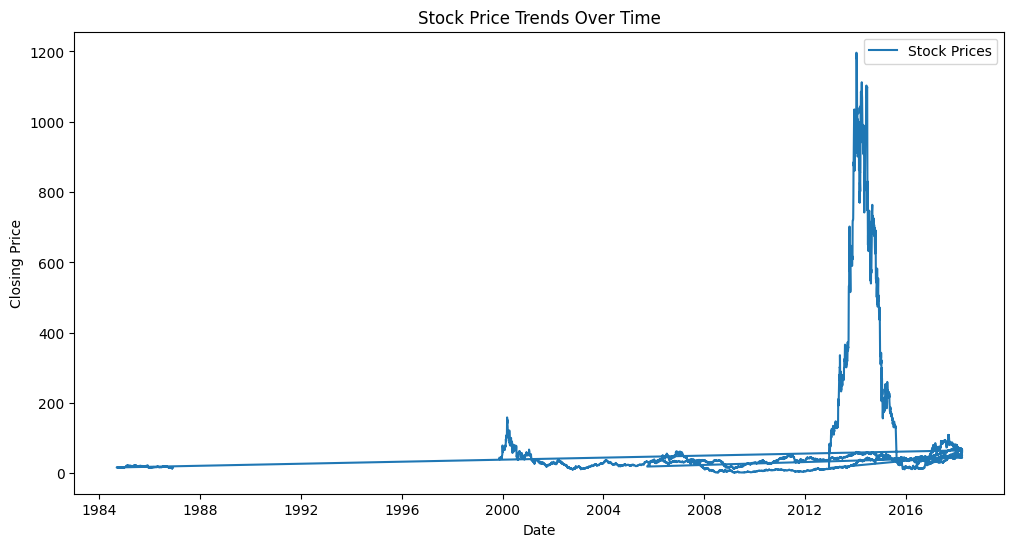

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

RMSE: 306.28919168177003


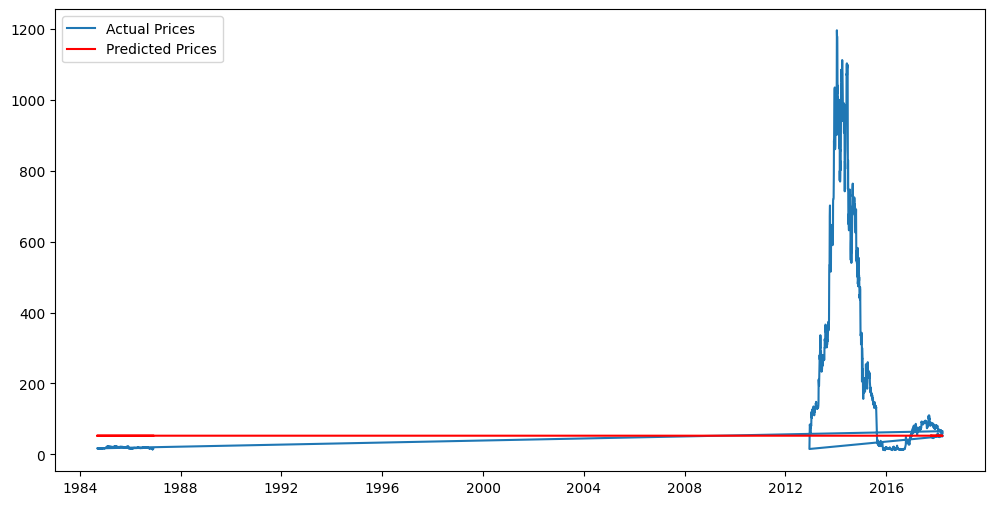

In [7]:
def stock_price_prediction():
    # Load dataset
    stock_data = pd.read_csv('WIKI-PRICES.csv', parse_dates=['date'], index_col='date')

    # Keep relevant columns
    stock_data = stock_data[['close']]

    # Visualizing stock price trends
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data, label='Stock Prices')
    plt.title('Stock Price Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

    # ARIMA Model
    train_size = int(len(stock_data) * 0.8)
    train, test = stock_data[:train_size], stock_data[train_size:]

    model = ARIMA(train, order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(test, forecast))
    print(f'RMSE: {rmse}')

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(test, label='Actual Prices')
    plt.plot(test.index, forecast, color='red', label='Predicted Prices')
    plt.legend()
    plt.show()

stock_price_prediction()